# Bank Marketing Campaign
Predictive Analysis

# Problem Statement:
The Portuguese banks faced a revenue decline, but there's hope for resilience. In 2023, they achieved healthy profitability levels, with an aggregate return on equity nearing 9%. Although stronger net interest margins remain elusive, solid efficiency will support their bottom lines despite a modest rise in credit losses. Asset quality deterioration is expected due to tighter financing conditions and lower private-sector savings, but it should be manageable. Banks are shifting toward term deposits, which provide stable funding. The macro environment in Portugal is expected to compare favorably with the eurozone in 2024, with projected economic growth of
 1.8%. Fiscal consolidation continues, and public debt reduction remains a priority¹. To address the revenue decline, the Portuguese bank should focus on identifying existing clients with a higher chance of subscribing to term deposits and tailor marketing efforts accordingly. Encouraging term deposits not only helps the bank hold onto deposits but also opens opportunities for cross-selling other financial products to boost revenues.

# Database Details:
The dataset describes the results of **Portugal bank marketing campaigns. These campaigns primarily involved direct phone calls, where bank clients were offered the opportunity to place a term deposit. If a client agreed to place the deposit, the target variable was marked as'yes'; otherwise, it was marked as'no'.

# Bank Client Data Attributes:
# Input Variables:
1 - age (numeric)

2 - job : type of job (categorical:'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Sets the maximum number of columns and rows that will be displayed in a pandas DataFrame when it is printed.
# (By default, pandas limits the output to the first 20 rows and the first 20 columns)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
# The warnings module in Python is used to issue warnings about potential problems in your code. These warnings can be helpful for debugging and identifying potential issues.
import warnings

# The filter warnings function is used to control how warnings are handled in your code. In this case, setting the argument to "ignore" tells Python to ignore all warnings.
# This is useful in situations where you are aware of potential warnings in your code but do not want to be interrupted by them. . For example, if you are using a library that is known to generate warnings, you can use this code snippet to suppress those warnings.

warnings.filterwarnings("ignore")

Loading Dataset

In [ ]:
df = pd.read_csv("/content/Bank.marketing campaign.zip")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


Detailed Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# you can extract the datatype this way too
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
# To get unique values of each variable
# This line of code applies a lambda function to each row in the dataframe df, calculates the number of unique values in each row, and then sorts the results in descending order.
df.apply(lambda x: len(x.unique())).sort_values(ascending = False)

balance      3805
duration     1428
pdays         472
age            76
campaign       36
previous       34
day            31
job            12
month          12
poutcome        4
education       4
contact         3
marital         3
loan            2
housing         2
default         2
deposit         2
dtype: int64

In [ ]:
# To find the shape of the dataset
# The df.shape() method in Pandas returns a tuple representing the dimensions of the DataFrame. The first element of the tuple is the number of rows in the DataFrame, and the second element is the number of columns.
df.shape

(11162, 17)

In [ ]:
# To extract columns
# The output of len(df.columns) is the number of columns in the df dataframe.
# There is no attribute rows in a Pandas dataframe. Therefore, len(df.rows) will result in an AttributeError.
len(df.columns)

17

In [ ]:
# If you want to find the number of rows in a Pandas dataframe, you can use the len() function on the dataframe itself, or use the shape attribute.

# For example:
# using len()
# num_rows = len(df)

# using shape as above
# num_rows = df.shape[0]

In [ ]:
len(df)

11162

In [ ]:
# Converting numeric into Categorical
#	df.astype(): This method is used to change the data type of one or more columns in a dataframe.	{'campaign': object, 'pdays': object, 'previous': object}: This is a dictionary that maps the column names to the desired data type. In this case, all three columns are being changed to the object data type

df = df.astype({'campaign': object, 'pdays': object, 'previous': object})

In [ ]:
# to extract the info of dataset to see the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  object
 13  pdays      11162 non-null  object
 14  previous   11162 non-null  object
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(4), object(13)
memory usage: 1.4+ MB


In [ ]:
# to extract the description of data in  DataFrame
#The .describe() method gives us summary statistics for numerical columns in our DataFrame.
df.describe()

,age,balance,day,duration
count,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818
std,11.913369,3225.413326,8.420740,347.128386
min,18.000000,-6847.000000,1.000000,2.000000
25%,32.000000,122.000000,8.000000,138.000000
50%,39.000000,550.000000,15.000000,255.000000
75%,49.000000,1708.000000,22.000000,496.000000
max,95.000000,81204.000000,31.000000,3881.000000


In [ ]:
# to extract the information of object type of variables
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,36,472,34,4,2
top,management,married,secondary,no,no,no,cellular,may,1,-1,0,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,4798,8324,8324,8326,5873


In [ ]:
# filter the categorical variables--->This code snippet first filters the data frame df to only include numeric columns, storing the result in df_num. Then, it iterates through each numeric column in df_num and prints the frequency of each unique value in that column.
df_num = df.select_dtypes(include= np.number)
                      # df.select_dtypes: This method filters the data frame based on data types.
                      # •	include= np.number: This argument specifies that only numeric data types should be included.
# print frequency of categories
for col in df_num:                       # This loop iterates through each column in df_num
    print (df[col].value_counts(), '\n')  # This method counts the number of times each unique value appears in the column.•	'\n': This adds a newline after printing the value counts for each column.

age
31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
29    328
40    326
41    299
42    295
28    292
46    258
47    255
45    253
43    249
27    246
49    241
44    238
26    235
48    214
52    205
53    204
55    197
50    194
51    194
54    187
59    184
57    184
56    177
60    169
25    168
58    159
24     95
23     68
61     66
22     48
62     45
63     38
64     37
77     31
21     30
67     29
66     29
73     29
72     28
71     27
65     27
68     24
70     23
76     21
20     20
69     20
78     19
74     18
75     18
80     17
19     13
79     10
82     10
81      9
18      8
83      7
86      5
84      5
85      5
87      4
90      2
92      2
93      2
88      2
95      1
89      1
Name: count, dtype: int64 

balance
 0        774
 1         39
 3         35
 2         34
 4         29
 5         27
 19        20
 8         19
 62        18
 21        17
 6         17
 67        17
 61        17
 46        17
 22 

In [ ]:
# filter the categorical variables
df_cat = df.select_dtypes(include=object)

# print frequency of categories
for col in df_cat:
    print (df[col].value_counts(), '\n')

 # This code snippet first filters the dataframe df to only keep the categorical columns, storing the result in df_cat.
# Then, it iterates over each column in df_cat and prints the frequency of each category in that column.


job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64 

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64 

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64 

default
no     10994
yes      168
Name: count, dtype: int64 

housing
no     5881
yes    5281
Name: count, dtype: int64 

loan
no     9702
yes    1460
Name: count, dtype: int64 

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64 

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64 

campaign
1     4798
2     3028
3     1321
4      771
5      

Exploratory Data Analysis

Missing Values

In [ ]:
# Checking if there are any null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

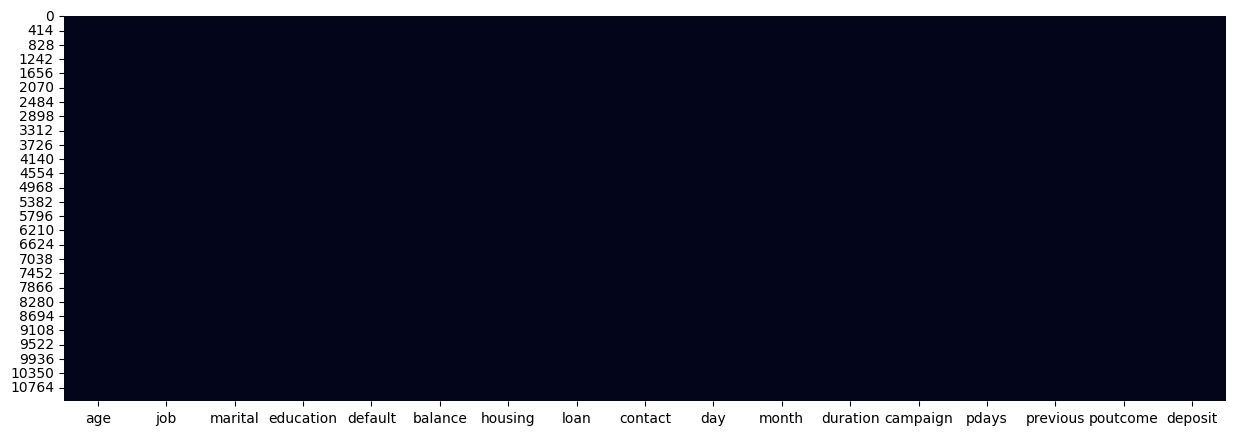

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# let us plot a heatmap of the missing values
# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(), cbar = False)

# display the plot
plt.show()

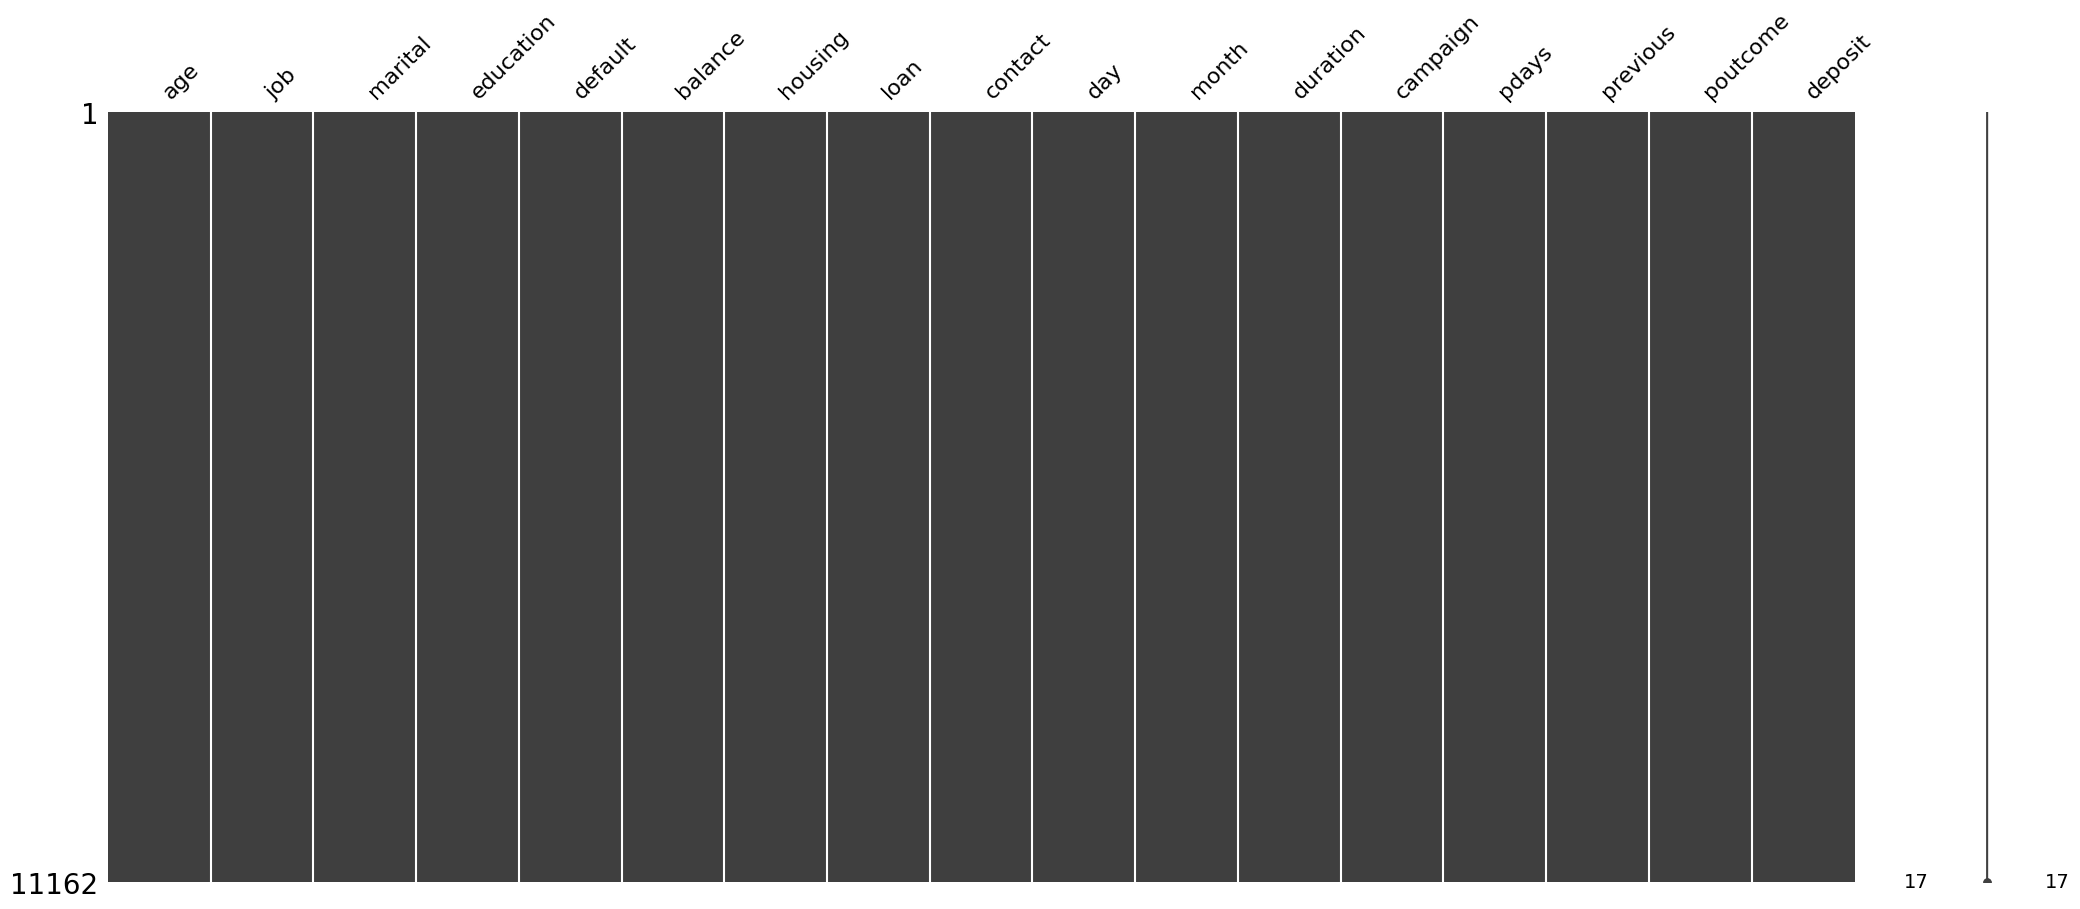

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()
 # this creates a missing matrix

Outlier

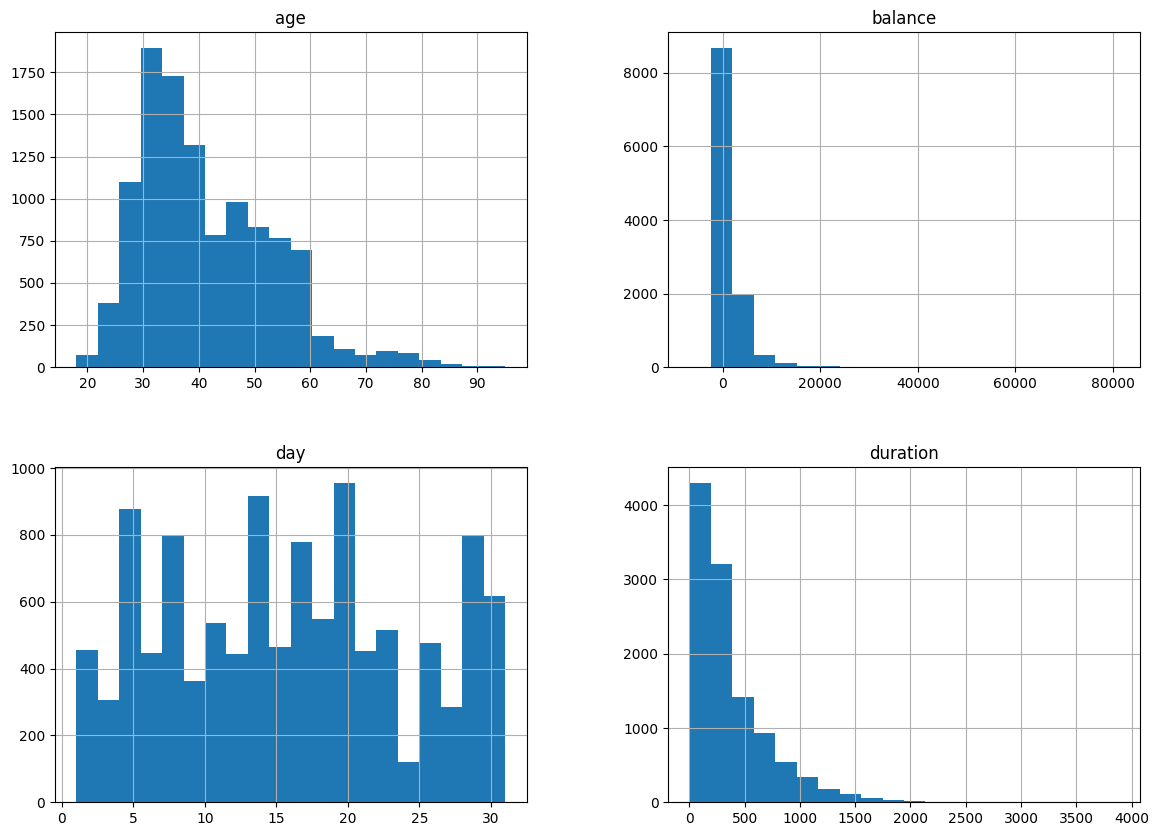

In [ ]:
# Lets plot histogram for all the numerical variables
df_num.hist(bins=20, figsize=(14,10))
plt.show()

In [ ]:
# to check the skewness of the data
df_num.skew().sort_values(ascending=False)
# 1.	Calculate the skewness of each numeric column in the df_num dataframe.
# 2.	Sort the resulting series in descending order, so that the columns with the highest skewness are shown first


balance     8.224619
duration    2.143695
age         0.862780
day         0.111330
dtype: float64

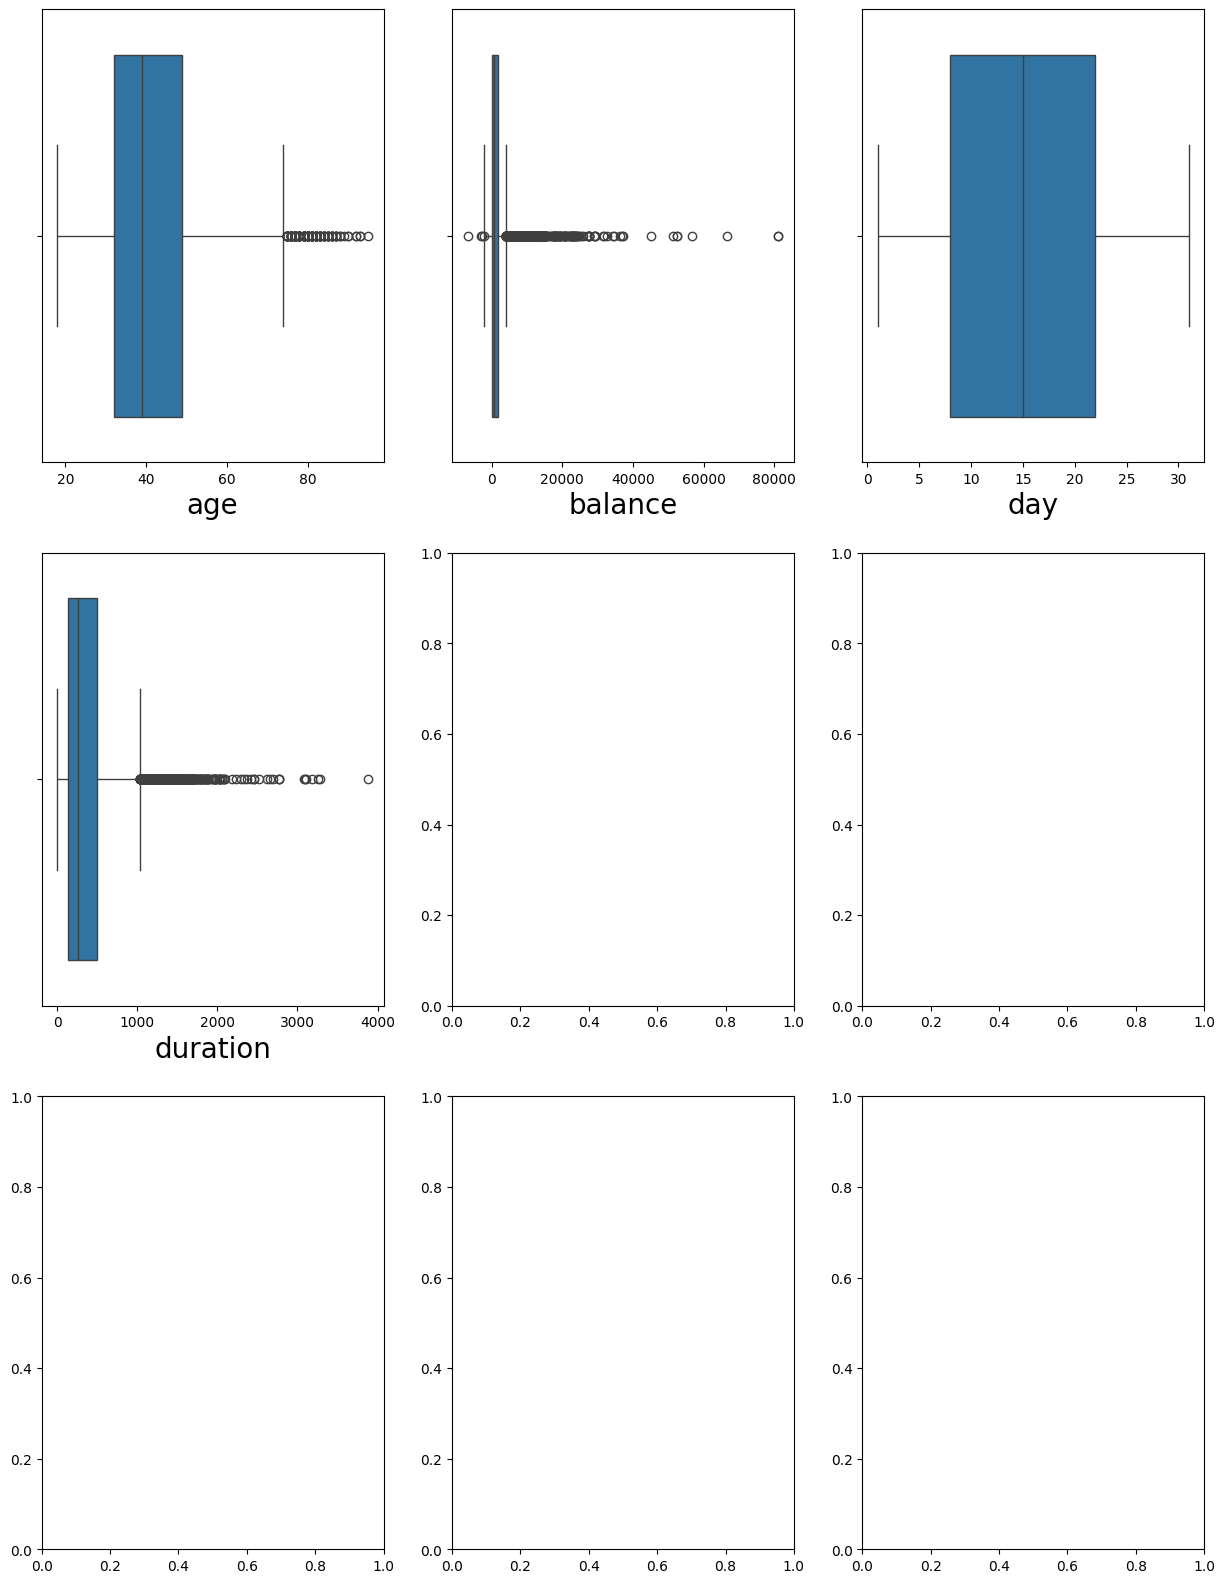

In [ ]:
# Lets plot boxplot for all numeric variables to check if the outliers are present.
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

# plot the boxplot for each variable
fig, ax = plt.subplots(3, 3, figsize=(15,20))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot)         # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)


Univarient Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df_num.head()

,age,balance,day,duration
0,59,2343,5,1042
1,56,45,5,1467
2,41,1270,5,1389
3,55,2476,5,579
4,54,184,5,673


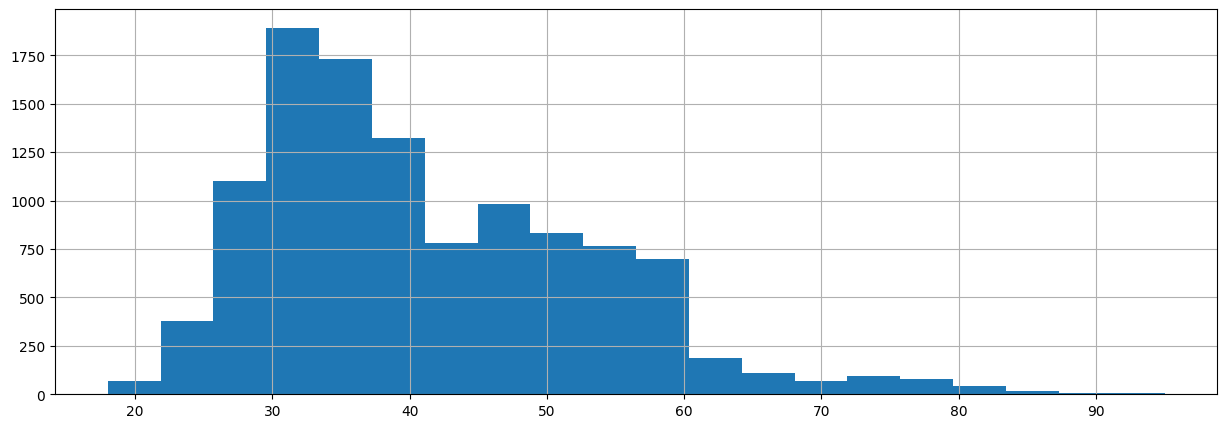

In [ ]:
# age
df['age'].hist(bins=20)
plt.show()

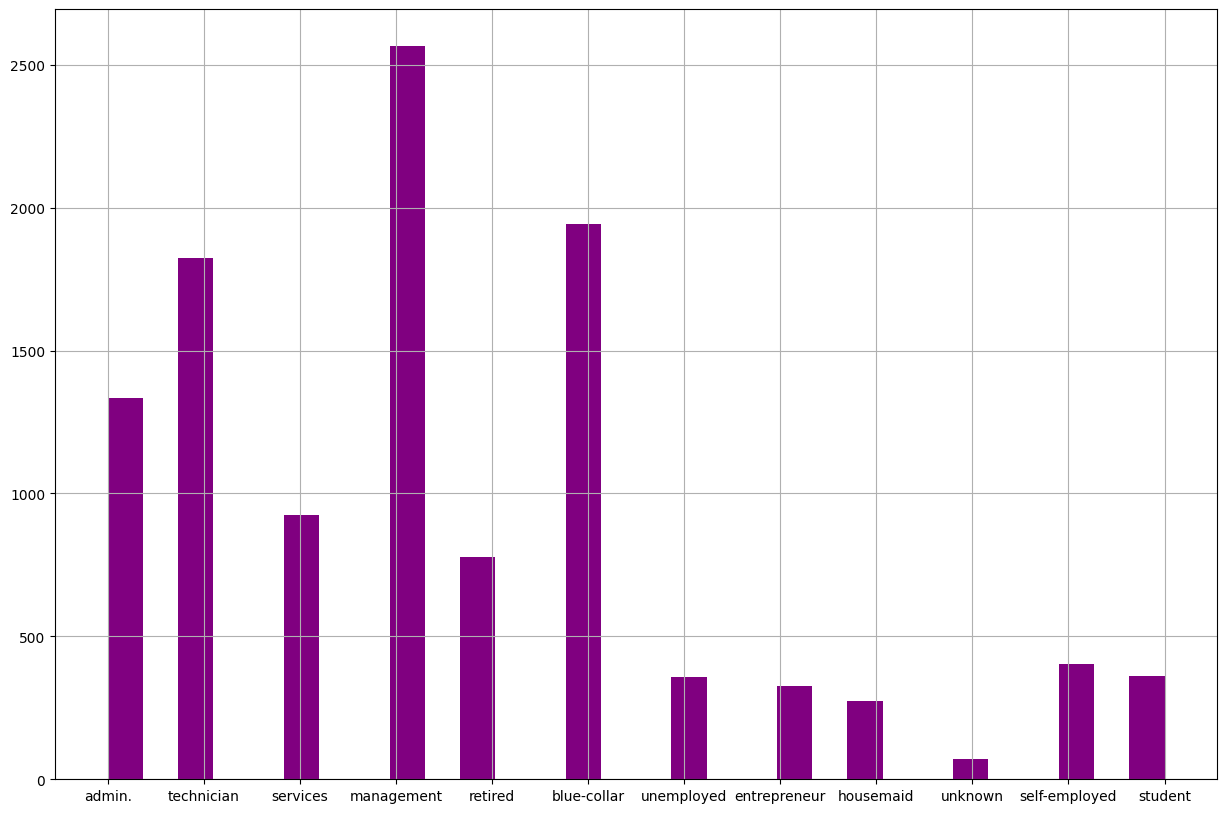

In [ ]:
df['job'].hist(color = "purple",
        bins = 30,
        figsize = (15, 10))
plt.show()

<Axes: xlabel='education', ylabel='count'>

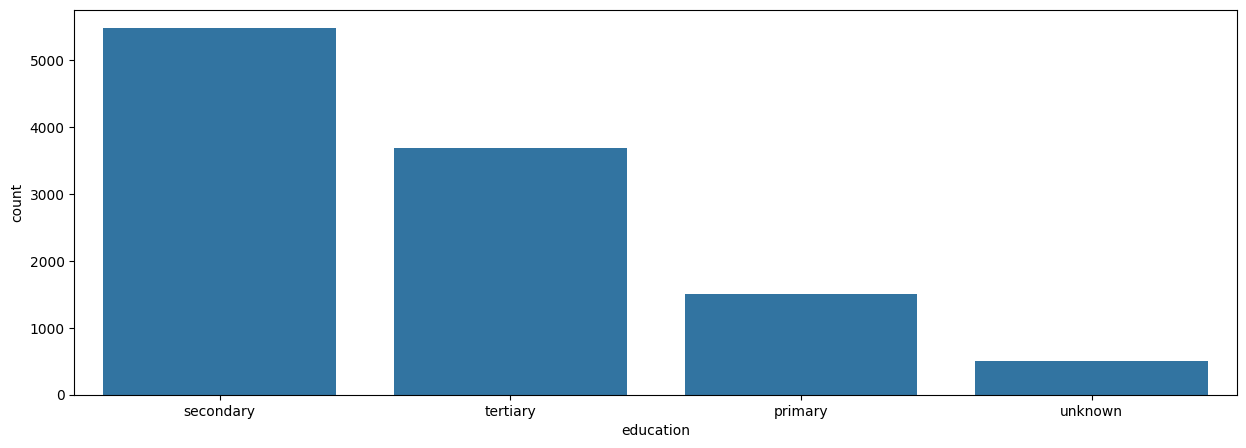

In [ ]:
# education
sns.countplot(data=df, x="education")

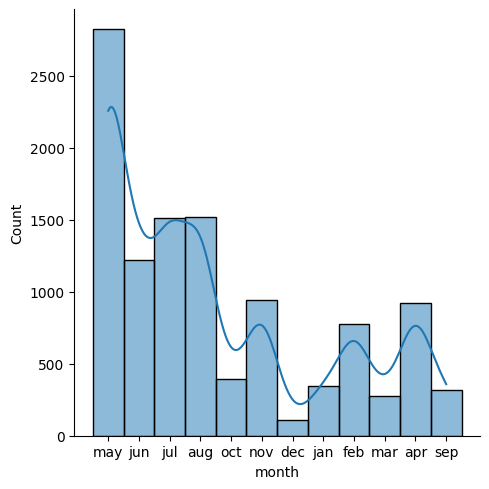

In [ ]:
# month
sns.displot(df, x="month", kde = 'True')
plt.show()

In [ ]:
#day_of_week
#sns.displot(df, x="day_of_week", shrink=.8)

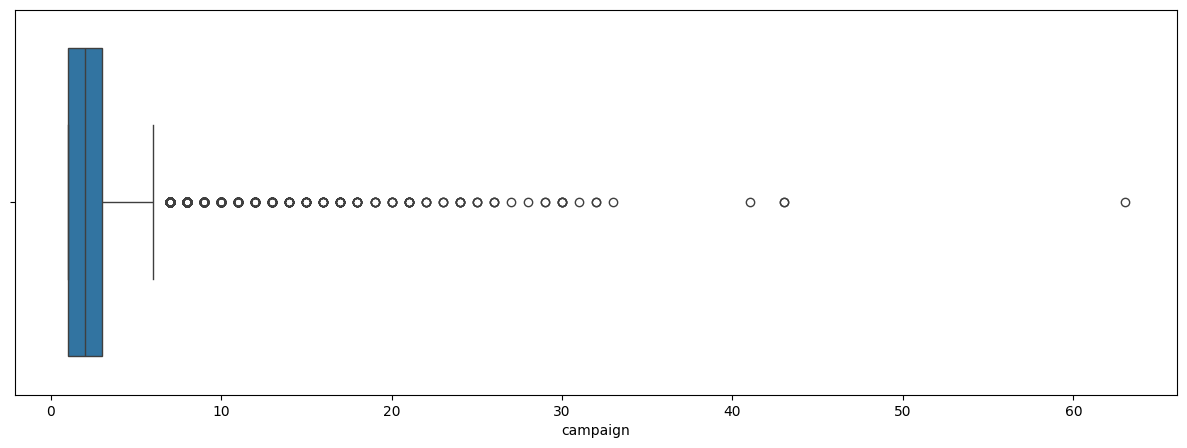

In [ ]:
#campaign
sns.boxplot(data = df, x="campaign")
plt.show()

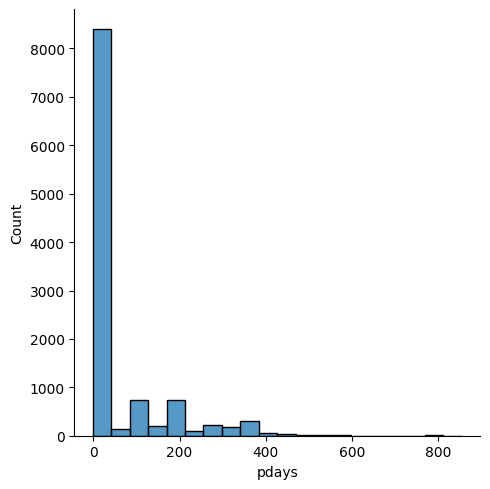

In [ ]:
# pdays
sns.displot(data = df, x="pdays",bins=20)
plt.show()

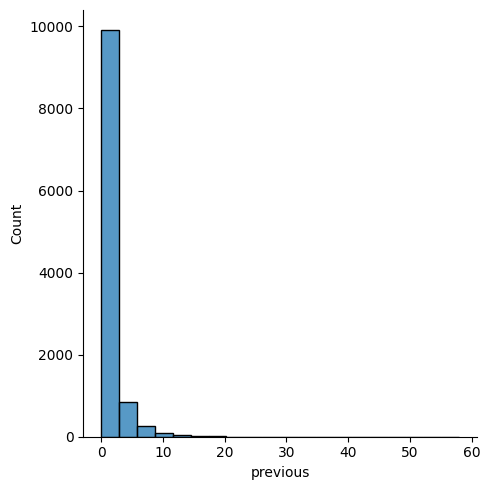

In [ ]:
# previous
sns.displot(data = df, x="previous",bins=20)
plt.show()

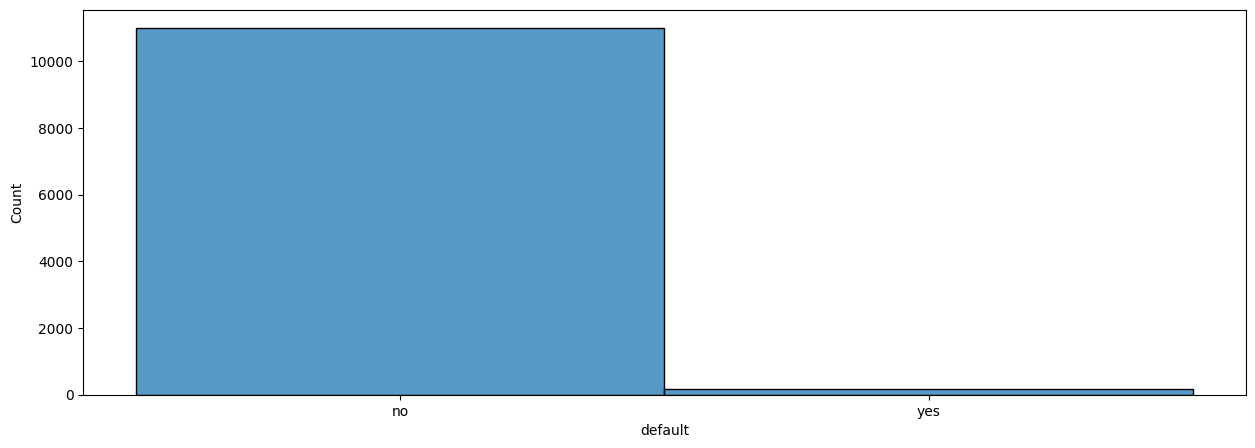

In [ ]:
# default
sns.histplot(data=df, x="default")
plt.show()

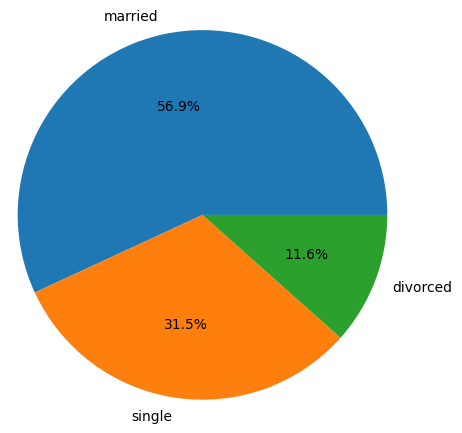

In [ ]:
unique_marital_values = df['marital'].unique()

# Create a pie chart
plt.pie(df.marital.value_counts(), autopct ='%.1f%%', radius = 1.2, labels = unique_marital_values)
plt.show()

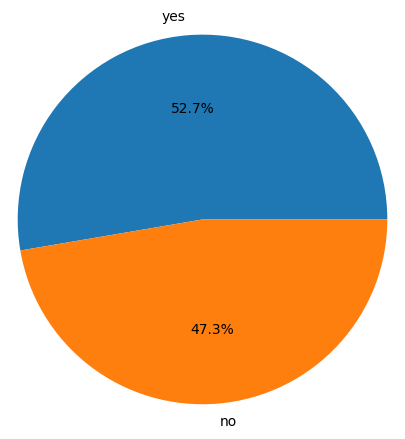

In [ ]:
unique_housing_values = df['housing'].unique()

# Create a pie chart
plt.pie(df.housing.value_counts(), autopct ='%.1f%%', radius = 1.2, labels = unique_housing_values)
plt.show()

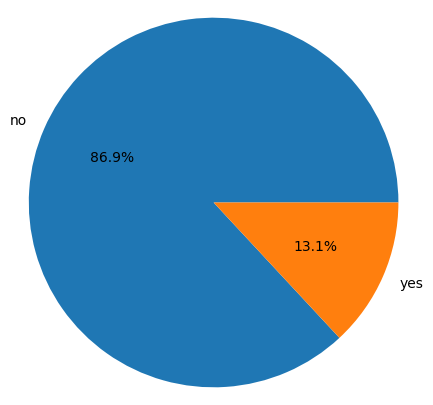

In [ ]:
unique_loan_values = df['loan'].unique()

# Create a pie chart
plt.pie(df.loan.value_counts(), autopct ='%.1f%%', radius = 1.2, labels = unique_loan_values)
plt.show()

In [ ]:
# contact
df.contact.value_counts
num_unique_values = df.contact.value_counts().size
labels = ['cellular', 'telephone']

Bivariate Analysis
Numerical v/s numerical

In [ ]:
# Bivariate
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,1,-1,0,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,1,-1,0,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,1,-1,0,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,1,-1,0,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,2,-1,0,unknown,yes


In [ ]:
df_num.head()

,age,balance,day,duration
0,59,2343,5,1042
1,56,45,5,1467
2,41,1270,5,1389
3,55,2476,5,579
4,54,184,5,673
